In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# import seaborn as sns

[System Requirements for MATLAB Engine API for Python](http://cn.mathworks.com/help/matlab/matlab_external/system-requirements-for-matlab-engine-for-python.html)

Ref:
- [Start and Stop MATLAB Engine for Python](http://cn.mathworks.com/help/matlab/matlab_external/start-the-matlab-engine-for-python.html)

In [11]:
import io
import matlab.engine
out = io.StringIO()
err = io.StringIO()
eng = matlab.engine.start_matlab()

In [8]:
eng.quit()

Ref: 
- [Call User Script and Function from Python](http://cn.mathworks.com/help/matlab/matlab_external/call-user-script-and-function-from-python.html)

In [3]:
!ls

GetColoredNoise.ipynb ZERO_DET_high_P.txt   iLIGOSensitivity.txt
GetLigoNoise.m        genligonoise.m        psd_zero.txt


In [4]:
# Matlab编辑
eng.edit('GetLigoNoise',nargout=0)
!ls

GetColoredNoise.ipynb ZERO_DET_high_P.txt   iLIGOSensitivity.txt
GetLigoNoise.m        genligonoise.m        psd_zero.txt


With the band-pass filtering that selects the region of 35 to 1024 Hz.

In [5]:
file = 'ZERO_DET_high_P.txt' # File containing target sensitivity curve
# Select pass band.
fLow = 9 #Hz 
fHigh = 9000 #Hz
Debug = True
# eng.GetLigoNoise(file, fLow, fHigh, Debug, nargout=0, stdout=out,stderr=err)
# Sampling frequency of the data to be generated (should be less than half
# of the maximum frequency in target PSD.
# fs = 4096;%Hz
# FIR filter order
# filtOrdr = 100;
# impDataNSamples = 2048;
# nDataSamples = 16384;

In [7]:
eng.GetLigoNoise(file, fLow, fHigh, True, stdout=out,stderr=err)

In [4]:
def Noise_fromLigo():
    Noise_Ligo = eng.GetLigoNoise(file, fLow, fHigh, False, stdout=out,stderr=err)
#     print(err.getvalue())
#     print(out.getvalue())
    return np.array(Noise_Ligo)[0]
Noise_fromLigo().shape

(8192,)

shape:  (8192,)
mean:  -6.9483382053e-26
std:  6.19714567657e-24
std:  1.0
The number of samples of white noise: 8192


/Users/Herb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(1e-25, 1e-21)

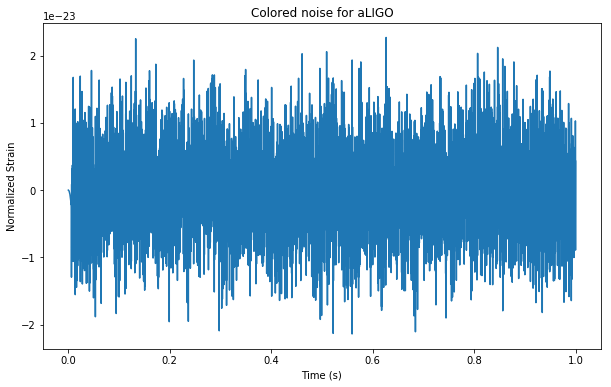

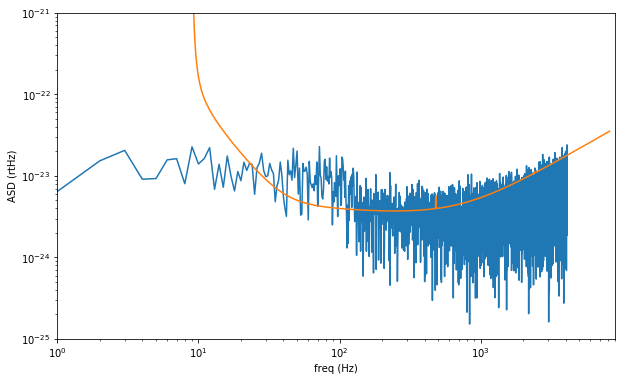

In [6]:
nsample = 8192
# Make plot for check 
randomSeries = Noise_fromLigo()
# sns.set_context("notebook")
# sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,1,nsample) ,randomSeries)
# plt.plot(np.linspace(0,1,nsample) ,(randomSeries-randomSeries.mean())/randomSeries.std())
plt.xlabel('Time (s)')
plt.ylabel('Normalized Strain')
plt.title('Colored noise for aLIGO')
print('shape: ' ,randomSeries.shape)
print('mean: ', randomSeries.mean())
print('std: ', randomSeries.std())

# Normalized strain
dd = (randomSeries-randomSeries.mean())/randomSeries.std()
print('std: ' , dd.std())

# Check the randomSeries for aLIGO
f = np.fft.fftfreq(nsample ) * nsample
psd0 = np.abs(np.fft.fft(randomSeries))**2 / len(randomSeries)
print('The number of samples of white noise: %s' %len(randomSeries))

# sns.set_context("notebook")
# sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.loglog(f[f>=0][1:], np.sqrt(psd0[f>=0])[1:] )
ZERO_DET = np.loadtxt('./ZERO_DET_high_P.txt')
plt.loglog(ZERO_DET[:,0],ZERO_DET[:,1])   # Frequency(Hz) , ASD(Strain/Hz)
plt.xlabel('freq (Hz)')
plt.ylabel('ASD (rtHz)')
plt.xlim(fLow-10, fHigh+10)
plt.ylim(1e-25,1e-21)
# plt.grid()

In [7]:
# The color of the noise matches a PSD which you provide
def normalized_noise(randomSeries, sigma=5.0):
    return sigma * (randomSeries-randomSeries.mean())/randomSeries.std()
# Creat a set of noise time series

def NormNoise(data_GW_shape, sigma):
    num = data_GW_shape
    y = []
    i = 0
    while i < num:   				
#         y.append(normalized_noise(Noise_fromLigo(),sigma))
        y.append(Noise_fromLigo()) 
        i+=1
        #if i%5==0: print('%s of generating %s noises' %(i/num ,num))
    return y 			# A set of noise time series which have the same shape with data_GW

In [24]:
data_GW_shape = 10000
sigma = 1
data_noise = np.array(NormNoise(data_GW_shape, sigma))
data_noise.shape
# It may take 13 mins

(10000, 8192)

In [25]:
pd.DataFrame(data_noise).to_csv('../Noise_data2/LigoNose9_9000_8192_4.csv')
# It may take 4 mins

In [26]:
!ls ../Noise_data2/

LigoNose9_9000_8192_3.csv LigoNose9_9000_8192_4.csv


In [15]:
!ls ../Noise_data2/
# !rm ../Noise_data2/*

LigoNose9_9000_8192_5.csv


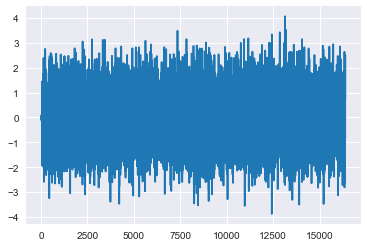

In [23]:
plt.plot(data_noise[0,:].tolist())

In [18]:
pd.read_csv('../Noise_data/LigoNose9_9000_8192_1.csv', index_col=0, nrows = 2)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,-1.851416e-28,5.728589e-27,1.004643e-26,6.342425e-27,1.166781e-26,6.185404e-27,-2.206391e-27,1.294658e-27,8.455106e-27,1.304367e-26,...,-4.001126e-24,3.468656e-24,-8.126242e-24,-1.024269e-23,5.156548e-24,-2.056193e-23,1.893195e-24,-1.071452e-23,-1.233000e-23,3.161093e-24
1,5.228653e-27,5.393392e-27,-1.344599e-26,-8.472808e-27,-2.166755e-26,-2.130211e-26,-1.746924e-26,-3.991712e-27,-4.104665e-27,-1.878266e-26,...,-6.492246e-24,5.507373e-26,8.047780e-24,-3.599893e-24,3.835406e-24,-3.241442e-24,-4.989194e-24,3.402128e-24,-2.253202e-24,1.101215e-23
